## Model Version 2

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [14]:
df = pd.read_csv("final.df.csv")
df.shape

(200000, 80)

In [15]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
df.describe()
# need to check (distribution extreme.. check after initial modeling) :  
#    dti, total_rec_late_fee, recoveries, tot_coll_amt, mths_since_rcnt_il, il_util, max_bal_bc, avg_cur_bal,
#    delinq_amnt, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mths_since_recent_revol_delinq, tax_liens

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,fico_range_mean,sub_grade_num,emp_length_num
count,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,14740.615375,14.047924,445.564543,7.432490e+04,18.931042,0.326485,0.694805,38.589950,11.683355,0.226445,1.590229e+04,52.740852,24.888360,12636.221310,2478.097381,2.624044,560.785900,3799.395097,641.761105,610.148025,0.018800,0.005245,230.022100,1.334342e+05,1.050920,2.714855,0.873715,1.915005,19.761910,3.351007e+04,70.205415,1.262295,2.713755,5505.012450,61.995210,3.119424e+04,1.167065,1.669000,2.407435,4.898570,12652.200355,9305.872275,61.043219,0.008975,16.915020,123.496620,177.572560,12.592685,7.572270,1.583020,23.051050,7.020060,41.13807,0.522660,3.702345,4.719860,7.997870,5.726970,0.003425,0.088390,2.271730,94.162227,46.697567,0.142080,0.054800,20540.207830,695.489473,12.822720,5.946410
std,8752.102580,4.954058,262.118049,7.020791e+04,11.675555,0.886051,0.964933,21.663606,5.529451,0.631672,2.076584e+04,24.399791,12.065927,9763.746055,2626.966900,13.561922,1410.832467,6281.502295,89.661439,169.790827,0.152829,0.079168,1775.613015,1.492501e+05,1.189981,2.953508,1.056642,2.005857,25.708152,4.046119e+04,23.289368,1.358994,2.337575,5174.260522,19.674457,3.094635e+04,1.683867,2.932574,2.615008,3.280455,15288.478032,14277.046880,28.251856,0.104616,943.077677,53.847389,94.626771,15.829046,8.539039,1.974375,30.106178,6.059382,21.84772,1.333422,2.268906,2.960616,4.750692,3.267695,0.062636,0.485539,1.894223,8.728537,36.143285,0.386451,0.436312,20559.740281,30.408820,6.669401,3.699005
min,500.000000,5.310000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000,0.000000,0.000000,0.000000,0.00

In [18]:
df = df.drop(['recoveries', 'last_pymnt_amnt','last_fico_range_high','last_fico_range_low','total_pymnt'], axis=1) 

### dummification for categorical variables

In [9]:
print(df.dtypes.value_counts())

int64      51
float64    13
object     11
dtype: int64


In [10]:
x_old = df[df.columns.difference(['loan_status'])]
y = df[['loan_status']]

In [11]:
x = pd.get_dummies(x_old, drop_first=True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### 1. Logistic Regression

In [15]:
log = LogisticRegression()

log.fit(x_train, y_train)

print('training prediction accuracy :  %.2f' % log.score(x_train, y_train))
print('test prediction accuracy :  %.2f' % log.score(x_test, y_test))

training prediction accuracy :  0.69
test prediction accuracy :  0.69


In [21]:
lr_log = LogisticRegression()
lr_log.fit(x_train, y_train)
lr_pred = lr_log.predict(x_test)

print('accuracy : %.2f' % accuracy_score(y_test, lr_pred))

accuracy : 0.69


In [20]:
test_pred_prob = lr_log.predict_proba(x_test)
roc_auc_score(y_test, test_pred_prob[:,1])

0.747396965817424

In [18]:
import dill
dill.dump_session('model_v2_save_test.db')

### 2. Random Forest

#### * Before Tuning

In [277]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print('rf accuracy : {0:.4f}' .format(accuracy))

rf accuracy : 0.6685


#### * Hyper Parameter tuning 

In [282]:
### It takes very long ###

from sklearn.model_selection import GridSearchCV

rf2_clf = RandomForestClassifier(random_state=1)
rf_params = {
    'n_estimators': [50, 100],    
    'max_depth': [6,8,10],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,12,18],
    "random_state": [1]
}

# GridSearchCV
rf_grid_cv = GridSearchCV(rf2_clf, param_grid=rf_params, cv=5)
rf_grid_cv.fit(x_train,y_train)

print('best parameter:\n', rf_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(rf_grid_cv.best_score_))

best parameter:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100, 'random_state': 1}
best prediction accuracy: 0.7010


In [287]:
### test with best param + n_estimators increase
rf3_clf = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                min_samples_split=8, random_state=1)
rf3_clf.fit(x_train, y_train)
rf3_pred = rf3_clf.predict(x_test)

print('rf3 accuracy : {0:.4f}' .format(accuracy_score(y_test, rf3_pred)))

rf3 accuracy : 0.7011


debt_settlement_flag_Y    0.176717
sub_grade_num             0.137189
int_rate                  0.134793
total_rec_late_fee        0.100565
term_ 60 months           0.061201
grade_B                   0.028728
fico_range_mean           0.027453
grade_E                   0.022417
total_rec_int             0.022264
dti                       0.020023
grade_D                   0.018276
avg_cur_bal               0.015258
loan_amnt                 0.014067
installment               0.012748
grade_C                   0.012210
bc_open_to_buy            0.011602
tot_cur_bal               0.010211
grade_F                   0.009475
acc_open_past_24mths      0.009404
annual_inc                0.009160
dtype: float64


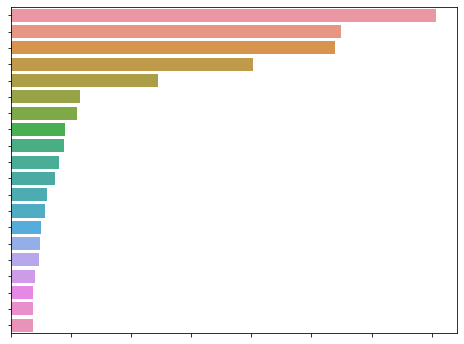

In [296]:
feature_imp = rf3_clf.feature_importances_
feature_imp = pd.Series(feature_imp, index=x_train.columns)
feature_top20 = feature_imp.sort_values(ascending=False)[:20]
print(feature_top20)

plt.figure(figsize=(8,6))
plt.title('Feature Importance (top20)')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

### 3. GBM

In [1]:
#### * Before Tuning

In [25]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('gbm accuracy : {0:.4f}'.format(gb_accuracy))
print('gbm running time : {0:.1f} seconds '.format(time.time()-start_time))

gbm accuracy : 0.7234
gbm running time : 100.1 seconds 


In [ ]:
#### * Hyper Parameter tuning

In [27]:
gb2_clf = GradientBoostingClassifier(random_state=1)
gb_params = {
    'n_estimators': [100,500],
    'learning_rate': [0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gb2_clf, param_grid=gb_params, cv=10, verbose=1)
gb_grid_cv.fit(x_train, y_train)

print('best parameter:\n', gb_grid_cv.best_params_)
print('best prediction accuracy: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 222.0min finished


best parameter:
 {'learning_rate': 0.1, 'n_estimators': 500}
best prediction accuracy: 0.7383


In [28]:
### test with best param 
gb3_pred = gb_grid_cv.best_estimator_.predict(x_test)
gb3_accuracy = accuracy_score(y_test, gb3_pred)

print('GBM accuracy(After tuning) : {0:.4f}' .format(gb3_accuracy))

GBM accuracy(After tuning) : 0.7366


### 4. XGBoost

In [30]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train_xgb = label_encoder.transform(y_train)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_test)
y_test_xgb = label_encoder.transform(y_test)

In [31]:
dtrain = xgb.DMatrix(data=x_train, label=y_train_xgb)
dtest = xgb.DMatrix(data=x_test, label=y_test_xgb)

In [32]:
xgb_params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 
              'early_stoppings':100}
num_rounds = 400

In [33]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = xgb_params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-logloss:0.676412	eval-logloss:0.676642
[1]	train-logloss:0.662649	eval-logloss:0.6631
[2]	train-logloss:0.651036	eval-logloss:0.651705
[3]	train-logloss:0.641144	eval-logloss:0.641959
[4]	train-logloss:0.632672	eval-logloss:0.633706
[5]	train-logloss:0.625469	eval-logloss:0.626627
[6]	train-logloss:0.619169	eval-logloss:0.620424
[7]	train-logloss:0.613645	eval-logloss:0.615077
[8]	train-logloss:0.609012	eval-logloss:0.610443
[9]	train-logloss:0.604744	eval-logloss:0.606312
[10]	train-logloss:0.601084	eval-logloss:0.602767
[11]	train-logloss:0.597886	eval-logloss:0.59967
[12]	train-logloss:0.59498	eval-logloss:0.596807
[13]	train-logloss:0.592086	eval-logloss:0.593986
[14]	train-logloss:0.589773	eval-logloss:0.591697
[15]	train-logloss:0.587694	eval-logloss:0.589731
[16]	train-logloss:0.585553	eval-logloss:0.587656
[17]	train-logloss:0.583829	eval-logloss:0.586033
[18]	train-logloss:0.582271	eval-logloss:0.584516
[19]	train-logloss:0.580586	eval-logloss:0.582869
[20]	train-log

[164]	train-logloss:0.524066	eval-logloss:0.531377
[165]	train-logloss:0.523986	eval-logloss:0.531308
[166]	train-logloss:0.523835	eval-logloss:0.531211
[167]	train-logloss:0.523722	eval-logloss:0.531145
[168]	train-logloss:0.523572	eval-logloss:0.531004
[169]	train-logloss:0.523499	eval-logloss:0.530961
[170]	train-logloss:0.523122	eval-logloss:0.530579
[171]	train-logloss:0.523049	eval-logloss:0.530508
[172]	train-logloss:0.522926	eval-logloss:0.530429
[173]	train-logloss:0.52284	eval-logloss:0.530388
[174]	train-logloss:0.522749	eval-logloss:0.530337
[175]	train-logloss:0.522579	eval-logloss:0.530185
[176]	train-logloss:0.5225	eval-logloss:0.530127
[177]	train-logloss:0.522393	eval-logloss:0.530072
[178]	train-logloss:0.522252	eval-logloss:0.529969
[179]	train-logloss:0.522173	eval-logloss:0.529946
[180]	train-logloss:0.522113	eval-logloss:0.52991
[181]	train-logloss:0.52205	eval-logloss:0.529865
[182]	train-logloss:0.521918	eval-logloss:0.529769
[183]	train-logloss:0.52179	eval-log

[326]	train-logloss:0.509731	eval-logloss:0.521406
[327]	train-logloss:0.509699	eval-logloss:0.521399
[328]	train-logloss:0.509652	eval-logloss:0.521373
[329]	train-logloss:0.509602	eval-logloss:0.521357
[330]	train-logloss:0.509519	eval-logloss:0.521318
[331]	train-logloss:0.509482	eval-logloss:0.521309
[332]	train-logloss:0.50942	eval-logloss:0.521298
[333]	train-logloss:0.509378	eval-logloss:0.521277
[334]	train-logloss:0.509322	eval-logloss:0.521242
[335]	train-logloss:0.509209	eval-logloss:0.52118
[336]	train-logloss:0.509166	eval-logloss:0.521181
[337]	train-logloss:0.509094	eval-logloss:0.521111
[338]	train-logloss:0.509009	eval-logloss:0.521037
[339]	train-logloss:0.508988	eval-logloss:0.521019
[340]	train-logloss:0.508922	eval-logloss:0.520982
[341]	train-logloss:0.508862	eval-logloss:0.520955
[342]	train-logloss:0.508821	eval-logloss:0.52095
[343]	train-logloss:0.508763	eval-logloss:0.520905
[344]	train-logloss:0.508676	eval-logloss:0.520841
[345]	train-logloss:0.508631	eval-

In [34]:
pred_probs = xgb_model.predict(dtest)
xgb_preds = [1 if x>0.5 else 0 for x in pred_probs]

In [35]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test_xgb, pred)
    accuracy = accuracy_score(y_test_xgb , pred)
    precision = precision_score(y_test_xgb , pred)
    recall = recall_score(y_test_xgb , pred)
    print('confusion matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

In [36]:
get_clf_eval(y_test_xgb, xgb_preds)

confusion matrix
[[12085  6418]
 [ 4203 17294]]
Accuracy: 0.7345, Precision: 0.7293, Recall: 0.8045
